In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

import os
import cv2

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#setting the directories for the data

#image proccessing thing from all the way below :/
def process_image(image):
    image = cv2.resize(image,(32,60)) # resize value could either be (65,120), (32,60) or (22,40). idk if latter gives up too much detail, third is too little detail
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image/255
    return image

#for the x data set
x_train_dir =  r"screenshots\Train"
x_test_dir = r"screenshots\Test"

#x data function
#going through the image folders
def get_images(dir):
    #temp variables
    r = []
    imgs = []
    #iterates through all the images in the train/test
    for root, dirs, files in os.walk(dir):
        for name in files:
            #makes a list of the images file names
            r.append(os.path.join(root, name))

    #gets the image from file name
    for file in r:
        pic = cv2.imread(file)
        pic = process_image(pic)
        imgs.append(pic)
    return np.array(imgs)

x_train = get_images(x_train_dir)
x_test = get_images(x_test_dir)

In [3]:
#for the y dataset
base = r"screenshots\\"

#y training data
train_start_menu_dir = base + r"Train\0 Start Menu"
train_in_game_menu_dir = base + r"Train\1 In Game"
train_second_chance_dir = base + r"Train\2 Second Chance"
train_rewards_dir = base + r"Train\3 Rewards"
train_replay_and_pause_dir = base + r"Train\4 Replay and Pause"

#puts all the directories in a list to be iterated through
y_train_dir = [train_start_menu_dir,train_in_game_menu_dir,train_second_chance_dir,train_rewards_dir,train_replay_and_pause_dir]

#y testing data
test_start_menu_dir = base + r"Test\0 Start Menu"
test_in_game_menu_dir = base + r"Test\1 In Game"
test_second_chance_dir = base + r"Test\2 Second Chance"
test_rewards_dir = base + r"Test\3 Rewards"
test_replay_and_pause_dir = base + r"Test\4 Replay and Pause"

#puts all the directories in a list to be iterated through
y_test_dir = [test_start_menu_dir,test_in_game_menu_dir,test_second_chance_dir,test_rewards_dir,test_replay_and_pause_dir]

#function to get the classes of the images
def get_labels(list):
    #temporary variables
    temp_classes = []
    label = 0

    #goes through the list containg the subfolders
    for folder in list:
        #goes through the subfolder containg one class each
        for root, dirs, files in os.walk(folder):
            #goes through each image and adds the label to the label list 
            for name in files:
                temp_classes.append(label)
        #adds one for each data class, to correspond with correct class
        label += 1

    temp_classes = np.array(temp_classes)
    return temp_classes

y_train = get_labels(y_train_dir)
y_test = get_labels(y_test_dir)

print(y_train.shape)
print(y_test.shape)

y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

print(np.unique(y_test))
print(y_cat_test.shape)
print(y_cat_test[0])

(645,)
(277,)
[0 1 2 3 4]
(277, 5)
[1. 0. 0. 0. 0.]


129
(60, 32)
min: 0.0196078431372549  max: 1.0
label: 1 [0. 1. 0. 0. 0.]


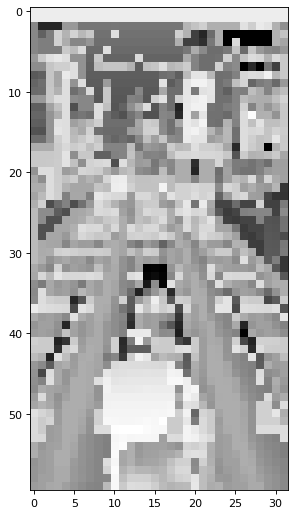

In [4]:
#this cell is just for testing

i = np.random.randint(0,len(x_train))
#i = 462
print(i)
image = x_train[i]

#image proccessing
'''
image = cv2.resize(image,(32,60)) # resize value could either be (65,120), (32,60) or (22,40). idk if latter gives up too much detail, third is too little detail
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = image/255
'''

print(image.shape)
print('min:', image.min(),' max:', image.max())
print('label:',y_train[i],y_cat_train[i])

figure(figsize=(10, 8), dpi=80)
plt.imshow(image, cmap="Greys")

In [5]:
#reshape the x/y t/t to proper shape
print('x_train shape:',x_train.shape,'x_test shape:',x_test.shape)

x_train = x_train.reshape(645,60,32,1)
x_test = x_test.reshape(277,60,32,1)

print('x_train shape:',x_train.shape,'x_test shape:',x_test.shape)

x_train shape: (645, 60, 32) x_test shape: (277, 60, 32)
x_train shape: (645, 60, 32, 1) x_test shape: (277, 60, 32, 1)


In [11]:
#making the model
#function to make models with different number of neurons in the first layer
def make_model(neurons):
    model = Sequential()

    model.add(Conv2D(filters=128,kernel_size=(4,4),strides=(8,15),padding='valid',input_shape=(32,60,1),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(neurons,activation='relu'))

    model.add(Dense(5,activation='softmax'))

    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss',patience=5)

    model.fit(x_train,y_cat_train,epochs=100,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

    metrics = pd.DataFrame(model.history.history)
    print(metrics)
    metrics[['accuracy','val_accuracy']].plot()
    metrics[['loss','val_loss']].plot()

    return model

Epoch 1/100
21/21 [==============================] - 0s 6ms/step - loss: 1.5777 - accuracy: 0.0388 - val_loss: 1.5362 - val_accuracy: 0.0325
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 1.5140 - accuracy: 0.0822 - val_loss: 1.4675 - val_accuracy: 0.1841
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 1.4427 - accuracy: 0.3473 - val_loss: 1.3874 - val_accuracy: 0.7112
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 1.3617 - accuracy: 0.7085 - val_loss: 1.2992 - val_accuracy: 0.7978
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 1.2705 - accuracy: 0.7395 - val_loss: 1.2098 - val_accuracy: 0.7978
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 1.1771 - accuracy: 0.7395 - val_loss: 1.1035 - val_accuracy: 0.7978
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 1.0758 - accuracy: 0.7395 - val_loss: 0.9844 - val_accuracy: 0.7978
Epoch 8/100
2

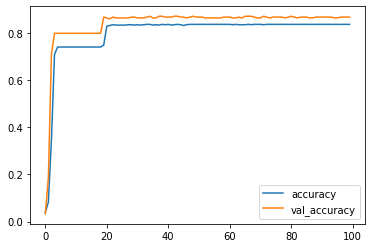

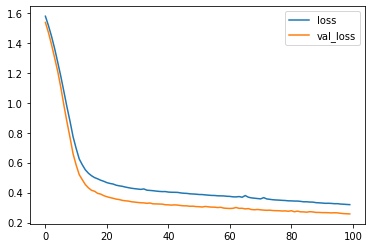

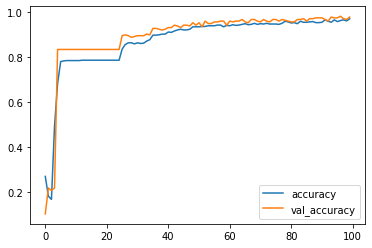

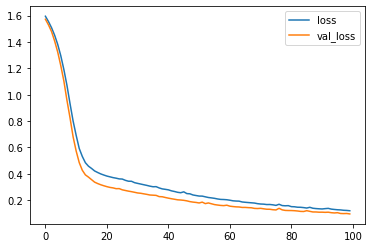

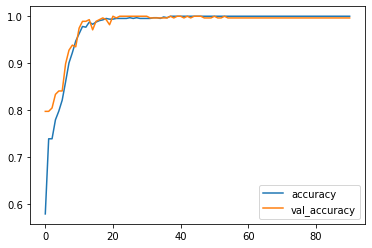

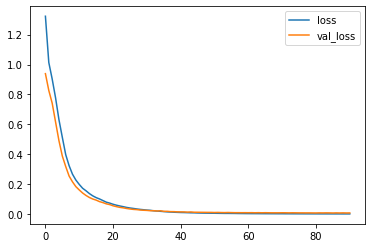

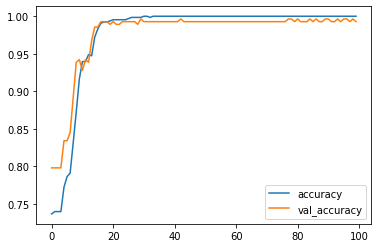

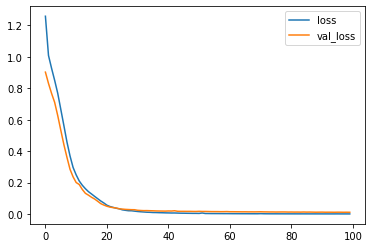

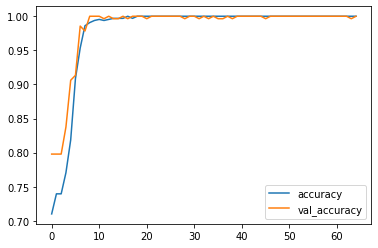

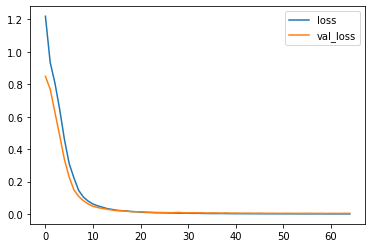

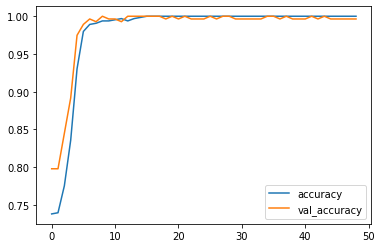

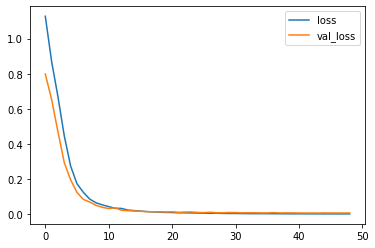

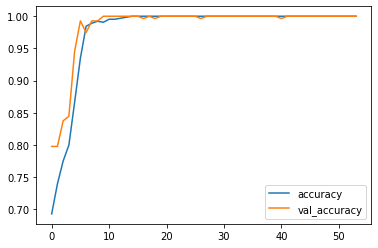

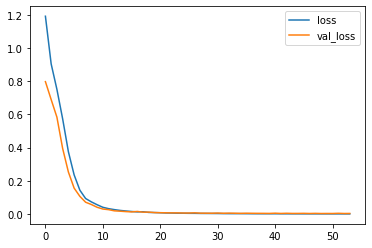

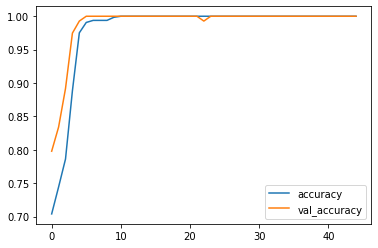

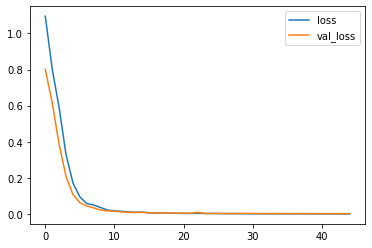

In [15]:
model2 = make_model(2)
model4 = make_model(4)
model8 = make_model(8)
model16 = make_model(16)
model32 = make_model(32)
model64 = make_model(64)
model128 = make_model(128)
model256 = make_model(256)

In [17]:
model_list = [model2,model4,model8,model16,model32,model64,model128,model256]
model_power = 2
#evaluates all the models
for model in model_list:
    predictions = model.predict(x_test)
    predictions = np.argmax(predictions, axis=1)
    print("model power:",model_power)
    print(classification_report(y_test,predictions))
    print(confusion_matrix(y_test,predictions))
    model_power *= 2

model power: 2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.92      1.00      0.96       221
           2       0.00      0.00      0.00        10
           3       0.51      0.95      0.67        20
           4       0.00      0.00      0.00        17

    accuracy                           0.87       277
   macro avg       0.29      0.39      0.33       277
weighted avg       0.77      0.87      0.81       277

[[  0   8   0   1   0]
 [  0 221   0   0   0]
 [  0  10   0   0   0]
 [  0   1   0  19   0]
 [  0   0   0  17   0]]
model power: 4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.97      1.00      0.99       221
           2       1.00      1.00      1.00        10
           3       1.00      0.70      0.82        20
           4       1.00      1.00      1.00        17

    accuracy                           

c:\ProgramData\anaconda3\envs\rl_env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\rl_env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\envs\rl_env\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model power: 128
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00       221
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        17

    accuracy                           1.00       277
   macro avg       1.00      1.00      1.00       277
weighted avg       1.00      1.00      1.00       277

[[  9   0   0   0   0]
 [  0 221   0   0   0]
 [  0   0  10   0   0]
 [  0   0   0  20   0]
 [  0   0   0   0  17]]
model power: 256
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00       221
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        17

    accuracy                       

In [17]:
# #save the models
# model_folder = r"weights/"
# model8.save_weights(model_folder+"model8")
# model32.save_weights(model_folder+"model32")
# model128.save_weights(model_folder+"model128")

In [18]:
# #save the models
# model_folder = r"models/"
# model8.save(model_folder+"model8")
# model32.save(model_folder+"model32")
# model128.save(model_folder+"model128")

INFO:tensorflow:Assets written to: models/model8\assets


INFO:tensorflow:Assets written to: models/model8\assets


INFO:tensorflow:Assets written to: models/model32\assets


INFO:tensorflow:Assets written to: models/model32\assets


INFO:tensorflow:Assets written to: models/model128\assets


INFO:tensorflow:Assets written to: models/model128\assets
